In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [21]:
def load_photos(directory):
    images = []
    labels = []
    for name in listdir(directory):
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(128, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value = name.split('_')[0]
        if value == '0':
            value = 0
        elif value == '1':
            value = 1
        labels.append(value)
        images.append(image)
    return images, labels

In [22]:
# load images from both train and test groups
directory = '../data/BigDataset-anticipation/Train'
images, labels = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)
directory = '../data/BigDataset-anticipation/Val'
images_val, labels_val = load_photos(directory)
nb_images_val = len(images_val)
print('Loaded Images and labels for validation: %d' % nb_images_val)

Loaded Images and labels for training: 496
Loaded Images and labels for validation: 51


In [4]:
#normalise datas
images = np.array(images)
images = images[:, 40:58, :, :]
images /= 255
images_val = np.array(images_val)
images_val = images_val[:, 40:58, :, :]
images_val /= 255

((496, 18, 160, 3), <matplotlib.image.AxesImage at 0x16b2a758080>)

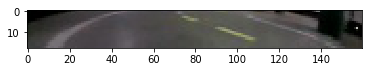

In [5]:
images.shape, plt.imshow(images[104])

In [6]:
#convert labels to np.array
labels = np.array(labels)
labels_val = np.array(labels_val)

In [7]:
#convert datas to dummyvalues
labelsd = pd.get_dummies(labels)

In [8]:
labelsd.shape, labelsd

((496, 2),      0  1
 0    1  0
 1    1  0
 2    1  0
 3    1  0
 4    1  0
 5    1  0
 6    1  0
 7    1  0
 8    1  0
 9    1  0
 10   1  0
 11   1  0
 12   1  0
 13   1  0
 14   1  0
 15   1  0
 16   1  0
 17   1  0
 18   1  0
 19   1  0
 20   1  0
 21   1  0
 22   1  0
 23   1  0
 24   1  0
 25   1  0
 26   1  0
 27   1  0
 28   1  0
 29   1  0
 ..  .. ..
 466  0  1
 467  0  1
 468  0  1
 469  0  1
 470  0  1
 471  0  1
 472  0  1
 473  0  1
 474  0  1
 475  0  1
 476  0  1
 477  0  1
 478  0  1
 479  0  1
 480  0  1
 481  0  1
 482  0  1
 483  0  1
 484  0  1
 485  0  1
 486  0  1
 487  0  1
 488  0  1
 489  0  1
 490  0  1
 491  0  1
 492  0  1
 493  0  1
 494  0  1
 495  0  1
 
 [496 rows x 2 columns])

In [9]:
#convert to np.array again
labelsd = np.array(labelsd)

In [10]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers

In [11]:
#from keras.models import load_model
#model = load_model('model-anticipation.h5')

In [16]:
K.clear_session()

img_in = Input(shape=(18, 160, 3), name='img_in')

x = img_in

x = Conv2D(1, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

flat = Flatten()(x)

x = Dense(20)(flat)
x = Activation('relu')(x)

#categorical output
out = Dense(2, activation='softmax')(x)

model = Model(inputs=[img_in], outputs=[out])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 18, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 160, 1)        28        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 160, 2)        20        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 160, 2)        38        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 160, 4)        76        
_________________________________________________________________
flatten_1 (Flatten)          (None, 11520)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                230420    
__________

In [18]:
h = model.fit(images, labelsd, batch_size=32, epochs=30, verbose=1)

Epoch 1/30
496/496 [==============================] - 1s - loss: 0.6541 - acc: 0.6855     
Epoch 2/30
496/496 [==============================] - 0s - loss: 0.5160 - acc: 0.7520     
Epoch 3/30
496/496 [==============================] - 0s - loss: 0.4864 - acc: 0.7823     
Epoch 4/30
496/496 [==============================] - 0s - loss: 0.4441 - acc: 0.8024     
Epoch 5/30
496/496 [==============================] - 0s - loss: 0.4033 - acc: 0.8286     
Epoch 6/30
496/496 [==============================] - 0s - loss: 0.3667 - acc: 0.8347     
Epoch 7/30
496/496 [==============================] - 0s - loss: 0.3258 - acc: 0.8569     
Epoch 8/30
496/496 [==============================] - 0s - loss: 0.2832 - acc: 0.8871     
Epoch 9/30
496/496 [==============================] - 0s - loss: 0.2393 - acc: 0.9133     
Epoch 10/30
496/496 [==============================] - 0s - loss: 0.2065 - acc: 0.9274     
Epoch 11/30
496/496 [==============================] - 0s - loss: 0.1794 - acc: 0.9476   

KeyboardInterrupt: 

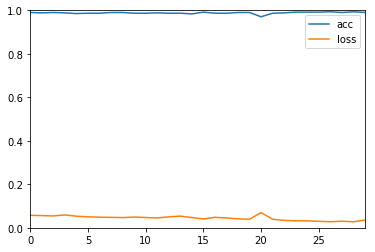

In [24]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

In [23]:
# Get predictions
all_preds = np.argmax(model.predict(images_val), axis=1)

all_preds, labels_val

ValueError: Error when checking model : the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 arrays but instead got the following list of 51 arrays: [array([[[  63.,   61.,   48.],
        [  62.,   60.,   47.],
        [  79.,   79.,   67.],
        ..., 
        [  11.,   15.,    1.],
        [   4.,    8.,    0.],
        [   2.,    6.,    0.]]...

In [20]:
import math
i = 0
res = 0
for value in all_preds:
    if value != labels_val[i]:
        res = res + 1
    i = i + 1
res/i

0.27450980392156865

In [27]:
model.save('model-BigDataset-anticipation.h5')